In [1]:
%matplotlib notebook
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import cm
import matplotlib.pyplot as plt

import glob

In [2]:
# Make sure cuda is available
import torch
torch.cuda.is_available()

True

### Check if the embeddings exist

In [3]:
!ls ../eval_embedding/contrast_dual_style_multiseed_1/

P6_1000test  P6_500test


In [4]:
!ls ../eval_embedding/contrast_dual_style_multiseed_1/P6_500test

00.1l.npy   20.2r.npy	320.4l.npy  440.5r.npy	560.7l.npy  690.1r.npy
00.1r.npy   20.3l.npy	320.4r.npy  440.6l.npy	560.7r.npy  690.2l.npy
00.2l.npy   20.3r.npy	320.5l.npy  440.6r.npy	570.1l.npy  690.2r.npy
00.2r.npy   20.4l.npy	320.5r.npy  440.7l.npy	570.1r.npy  690.3l.npy
00.3l.npy   20.4r.npy	320.6l.npy  440.7r.npy	570.2l.npy  690.3r.npy
00.3r.npy   20.5l.npy	320.6r.npy  450.1l.npy	570.2r.npy  690.4l.npy
00.4l.npy   20.5r.npy	320.7l.npy  450.1r.npy	570.3l.npy  690.4r.npy
00.4r.npy   20.6l.npy	320.7r.npy  450.2l.npy	570.3r.npy  690.5l.npy
00.5l.npy   20.6r.npy	330.1l.npy  450.2r.npy	570.4l.npy  690.5r.npy
00.5r.npy   20.7l.npy	330.1r.npy  450.3l.npy	570.4r.npy  690.6l.npy
00.6l.npy   20.7r.npy	330.2l.npy  450.3r.npy	570.5l.npy  690.6r.npy
00.6r.npy   210.1l.npy	330.2r.npy  450.4l.npy	570.5r.npy  690.7l.npy
00.7l.npy   210.1r.npy	330.3l.npy  450.4r.npy	570.6l.npy  690.7r.npy
00.7r.npy   210.2l.npy	330.3r.npy  450.5l.npy	570.6r.npy  700.1l.npy
100.1l.npy  210.2r.npy	330.4l.npy  450.5r.npy

## Eval embedding visualization

Read the style embeddings we're going to visualize, style embeddings are in the shape of `bz, 8`. In order to use the same PCA transform with all the following embeddings, we duplicate the style embeddings on its `axis=1` two times with baseline method

This is the training curve at OOD Extra (0.7 minimum distance both right/left hand rule)
![title](https://i.ibb.co/19ptHr0/image.png)

In [5]:
def get_eval_embed(inp='.1r', type='style_embedding', folder='../eval_embedding/contrast_dual_style_multiseed_1/P6_500test'):
    embeds = []
    labels = []
    for file in glob.glob('{}/*{}.npy'.format(folder, inp)):
#         print(file)
        embedding = np.load(file, allow_pickle=True)
        # print(embedding[()].keys()) 'style_embedding', 'label', 'latent_content_space', 'first_concat', 'second_concat'
        embed = np.array(embedding[()][type])
        embed_dim = embed.shape[1]
        embed = embed.reshape(-1, embed_dim)
        embeds.append(embed)
    embeds = np.vstack(embeds)
    # print(embeds.shape)
    ev_embeds = embeds
    return ev_embeds

n = 2
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)

In [6]:
def fit_pca(n=2):
    n = n
    ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
    ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
    ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
    ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
    ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
    ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
    ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
    ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
    ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
    ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
    ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
    ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
    ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
    ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)
    eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
    eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
    ev_labels = np.arange(14).reshape(-1, 1)
    eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

    pca = PCA(n_components=3)
    pca.fit(eval_iid_embedding)
    return pca

In [7]:
ev_embed_3_l.shape

(5000, 16)

fit a PCA with projection to 2 dims on the style embeddings

[0.64664817 0.19374624 0.12378691]


<IPython.core.display.Javascript object>


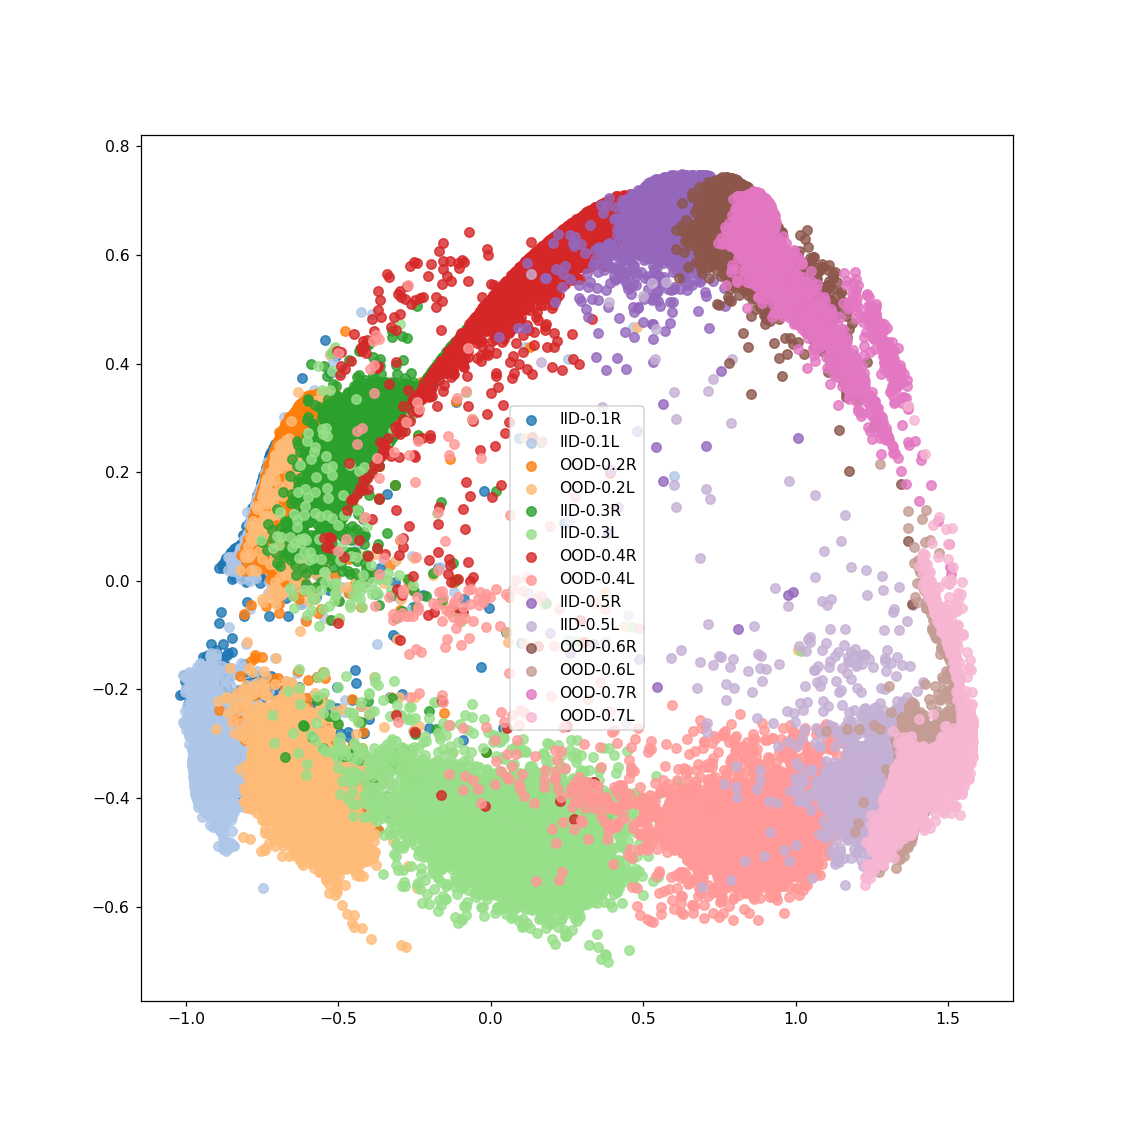

In [8]:
# fit a pca that projects to style embedding direction
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

# pca = PCA(n_components=3)
# pca.fit(eval_iid_embedding)
pca = fit_pca()
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.8)
plt.legend()

[0.67881656 0.21096788 0.11021549]


<IPython.core.display.Javascript object>


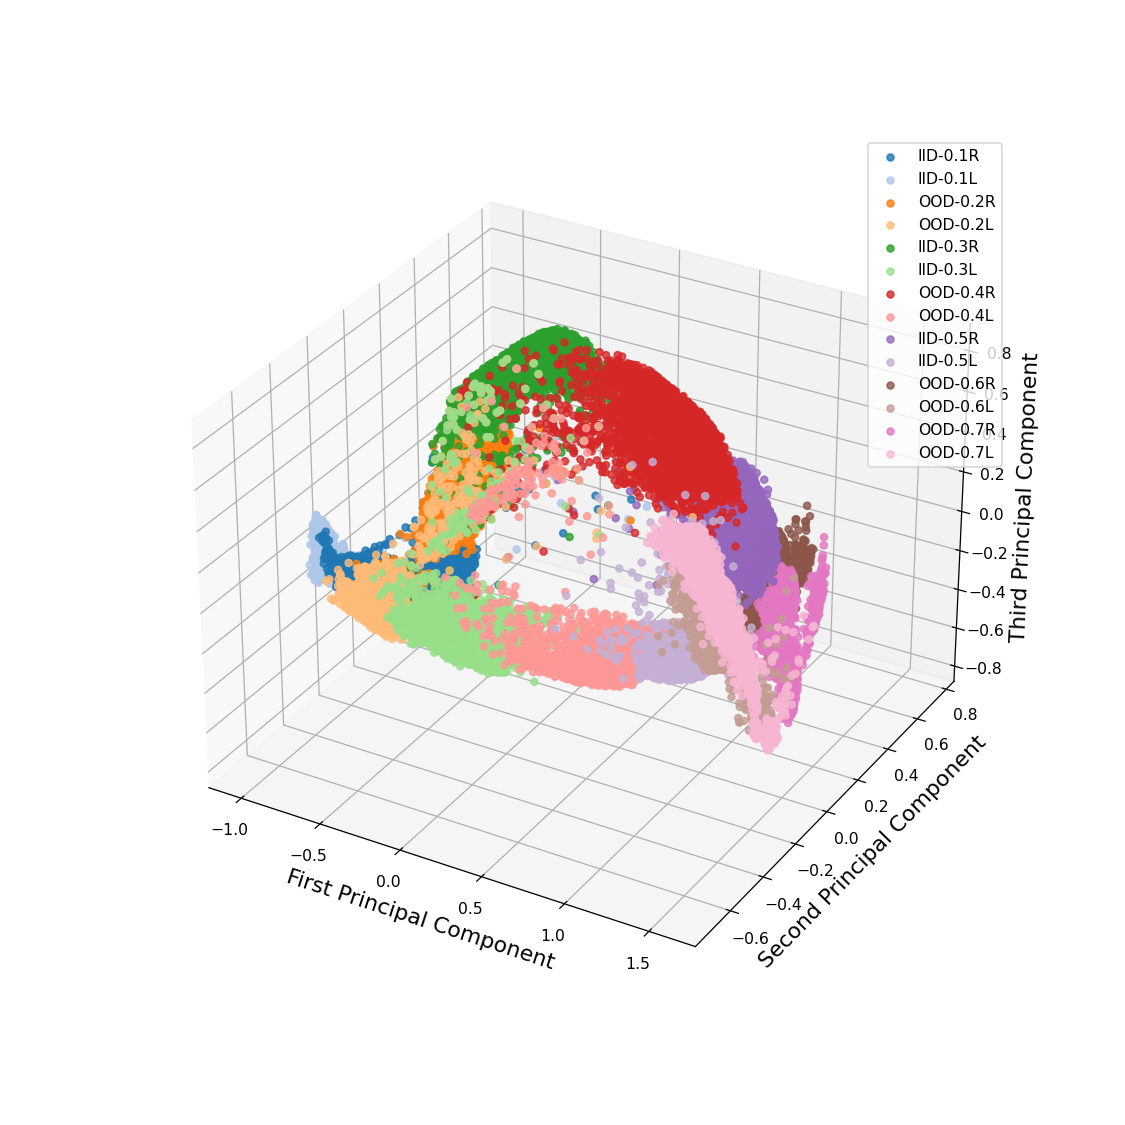

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = eval_iid_embedding
y = eval_labels
target_X = eval_all_embedding


# pca = PCA(n_components=3)
# pca.fit(X) 
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=0.8)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

We also try to use T-SNE to visualize the style embedding, however, compared to PCA, T-SNE is non-deterministic, which means that it's outcome is random and cannot apply the same transformation to other embeddings.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.002s...


/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 70000 samples in 110.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sample 13000 / 70000
[t-SNE] Computed conditional probabilities for sample 14000 / 700

<IPython.core.display.Javascript object>


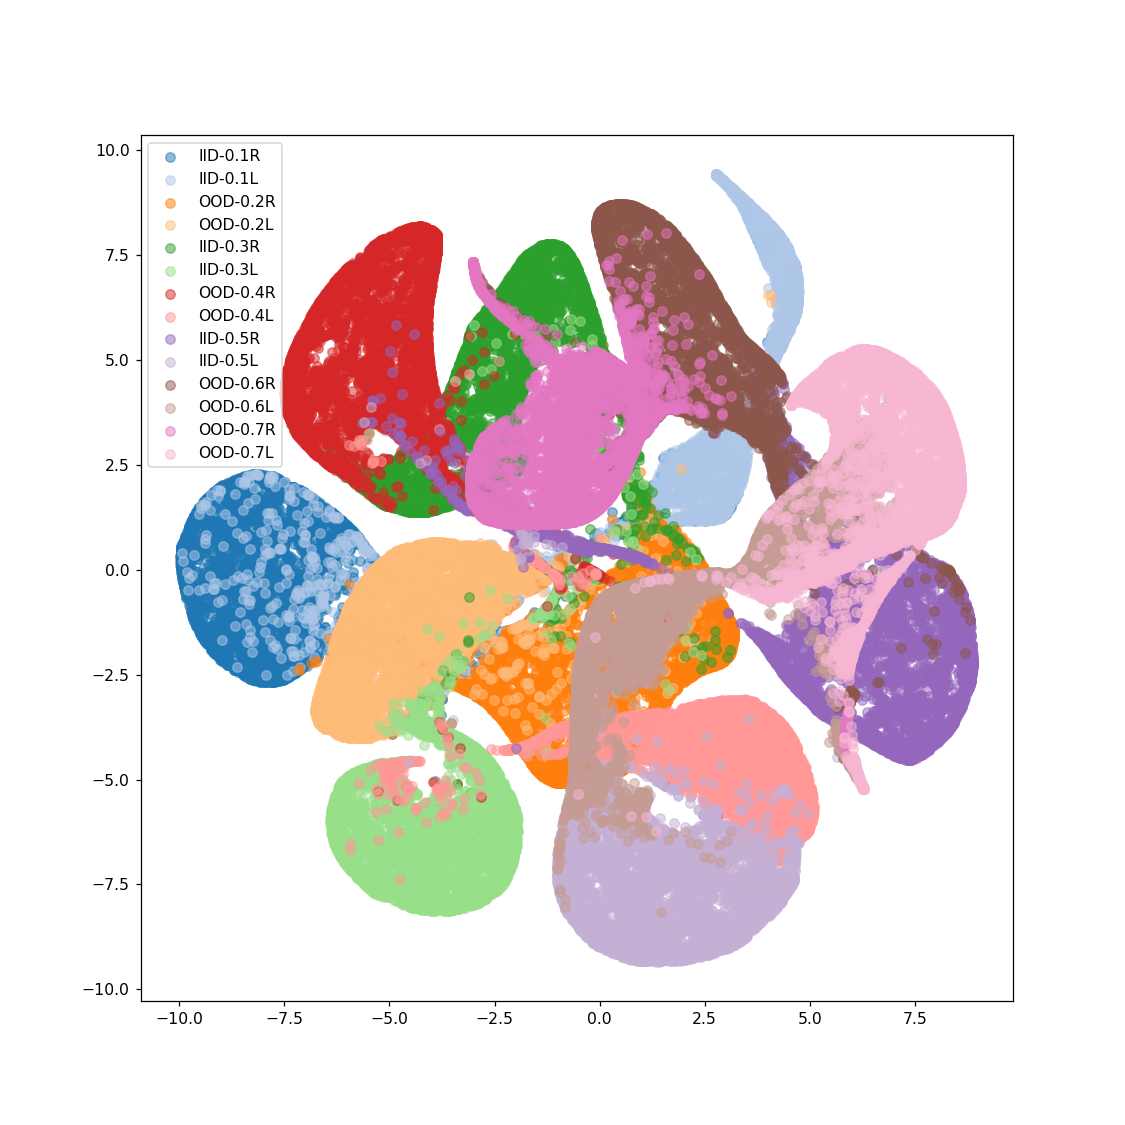

In [10]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()

### Visualize the first concatenated embeddings
Get the first concatenated embeddings: <invariant, style>
The shape of concatenated embeddings are `bz, 24`

In [11]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='first_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='first_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='first_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='first_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='first_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='first_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='first_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='first_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='first_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='first_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='first_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='first_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='first_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='first_concat')

In [12]:
ev_embed_7_l.shape

(5000, 16)

[0.64664817 0.19374624 0.12378691]


<IPython.core.display.Javascript object>


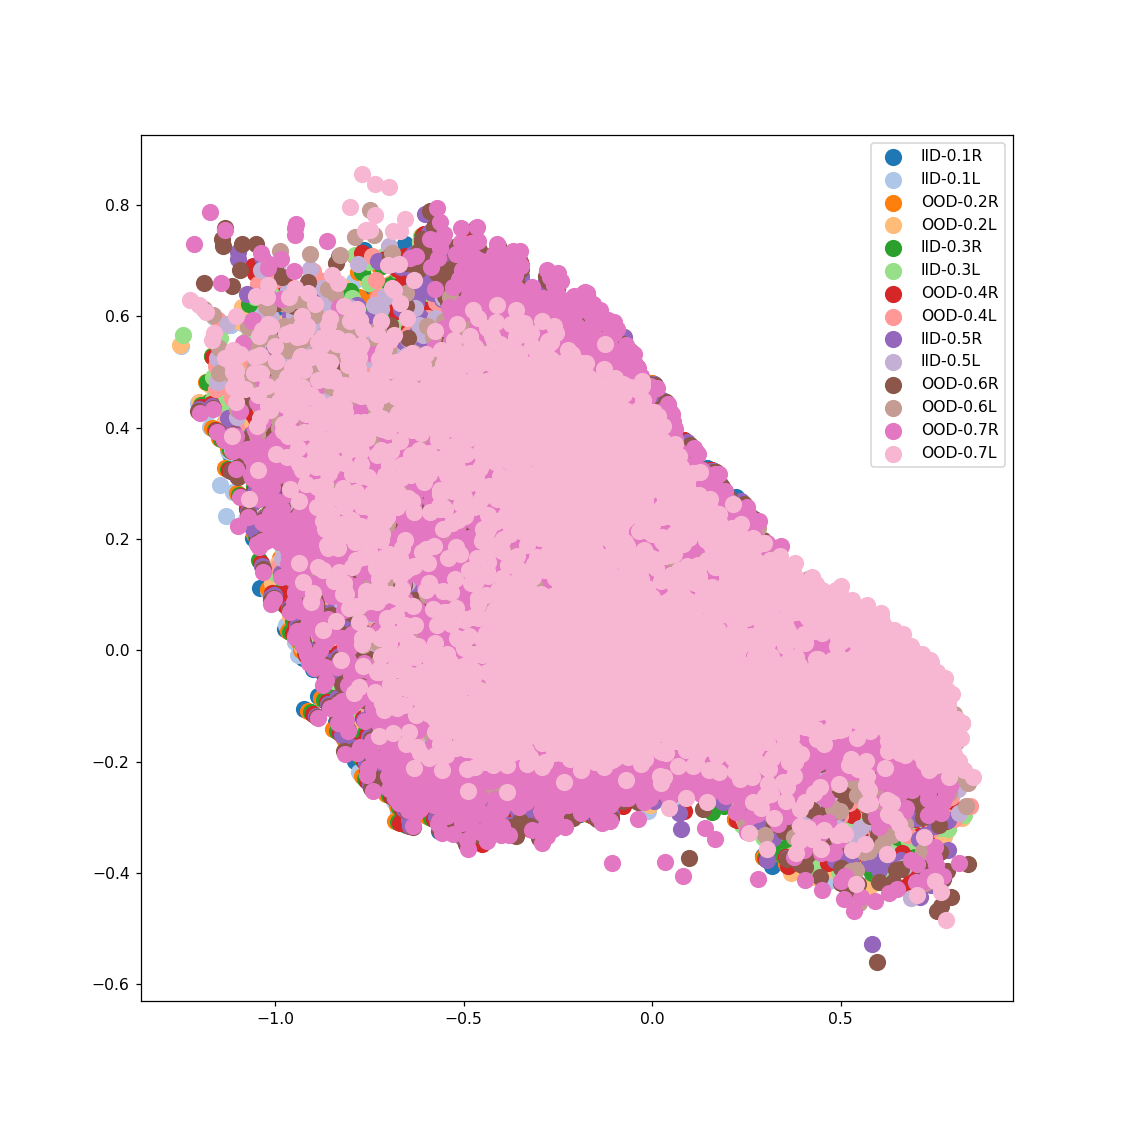

In [13]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in []:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.64664817 0.19374624 0.12378691]


<IPython.core.display.Javascript object>


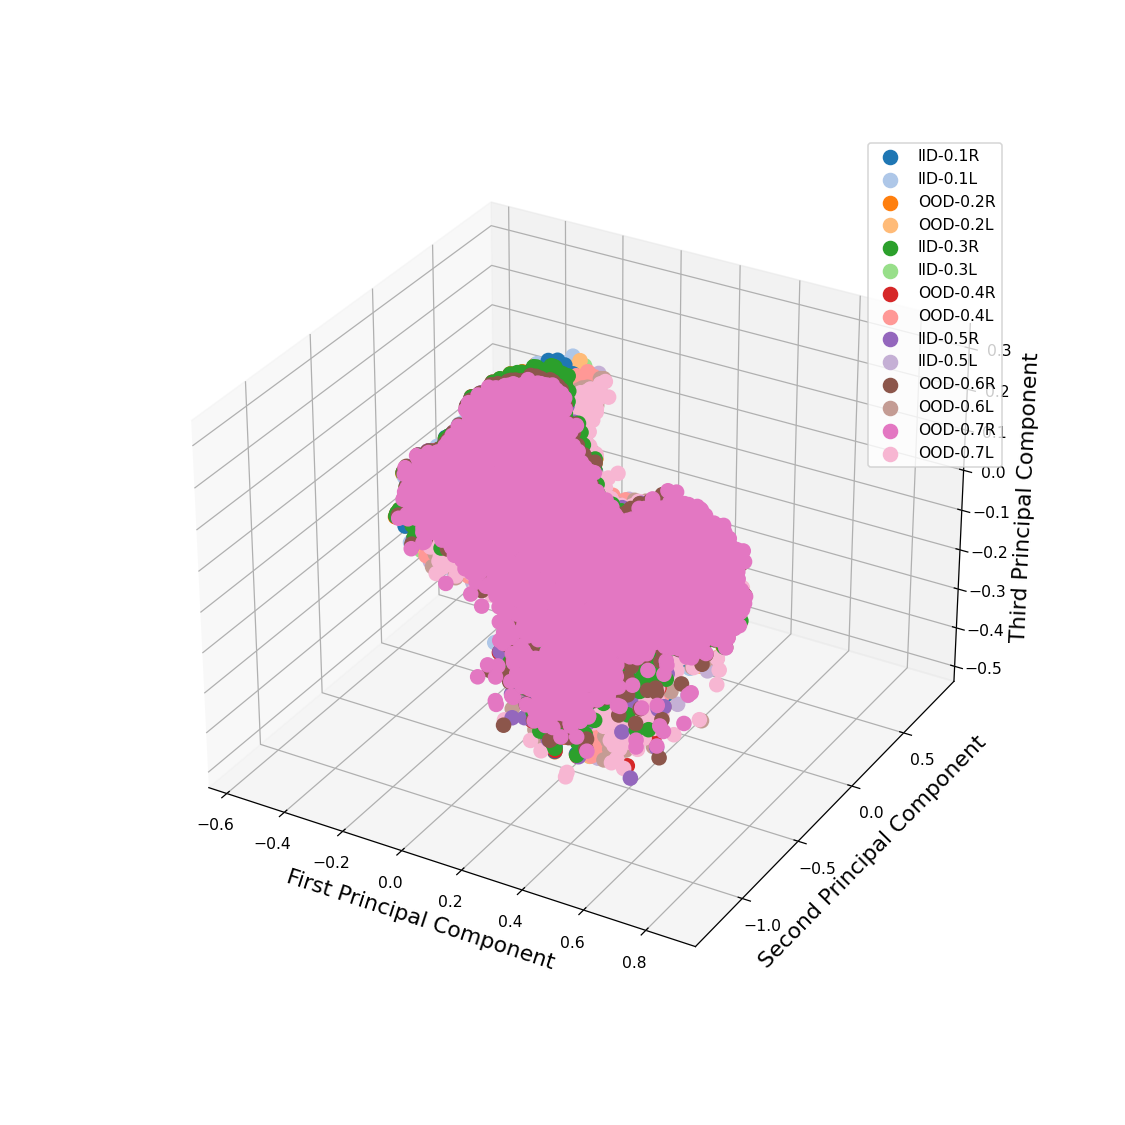

In [14]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

print(pca.explained_variance_ratio_)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l not in []:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [15]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='second_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='second_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='second_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='second_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='second_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='second_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='second_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='second_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='second_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='second_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='second_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='second_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='second_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='second_concat')

In [16]:
pca = fit_pca(4)

In [17]:
ev_embed_7_l.shape

(5000, 32)

[0.64664805 0.19374606 0.12378689]


<IPython.core.display.Javascript object>


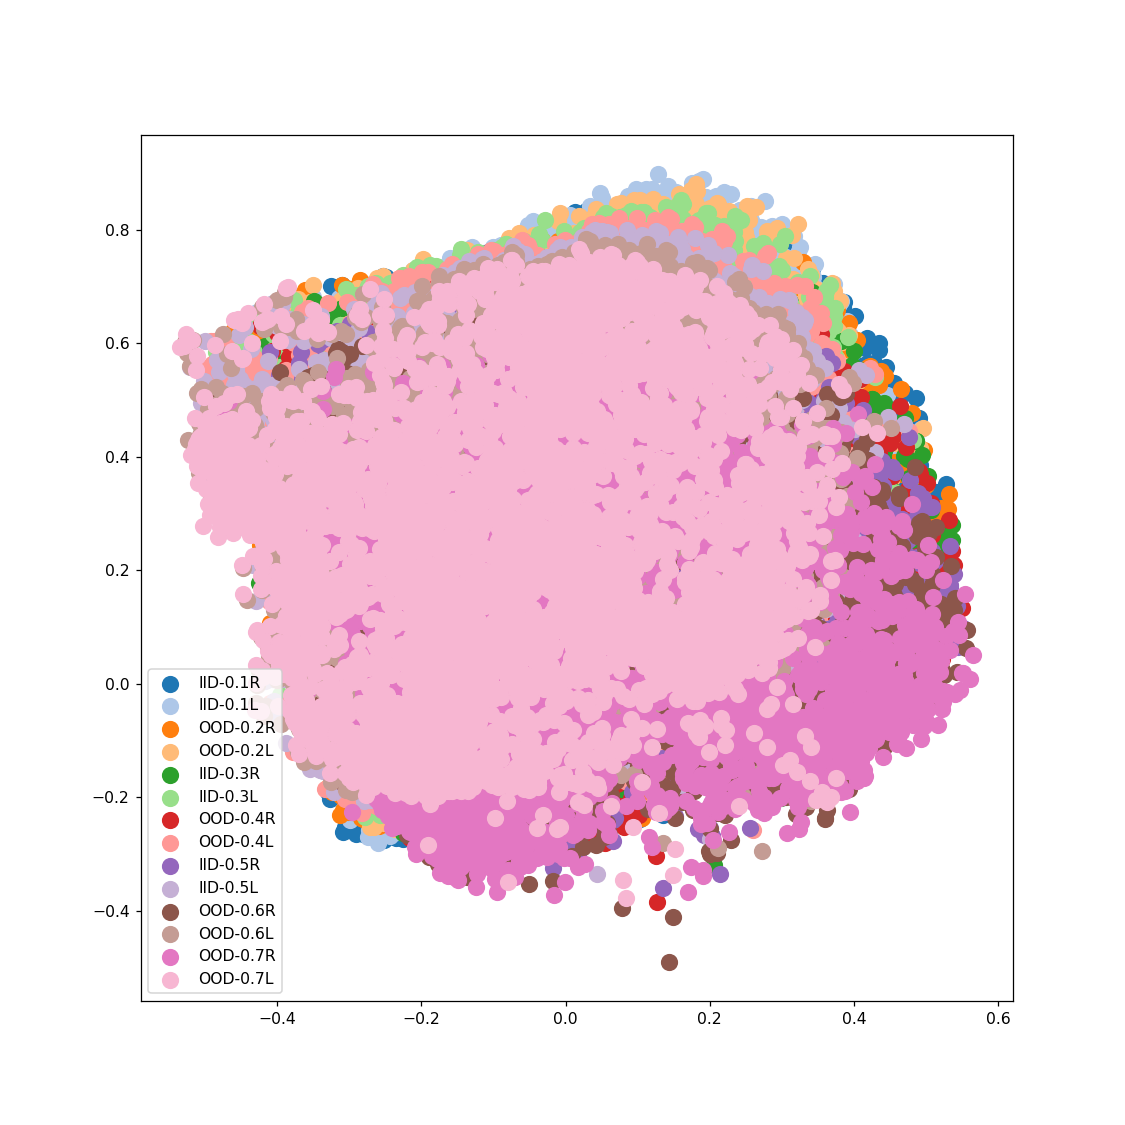

In [18]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in []:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.64664805 0.19374606 0.12378689]


<IPython.core.display.Javascript object>


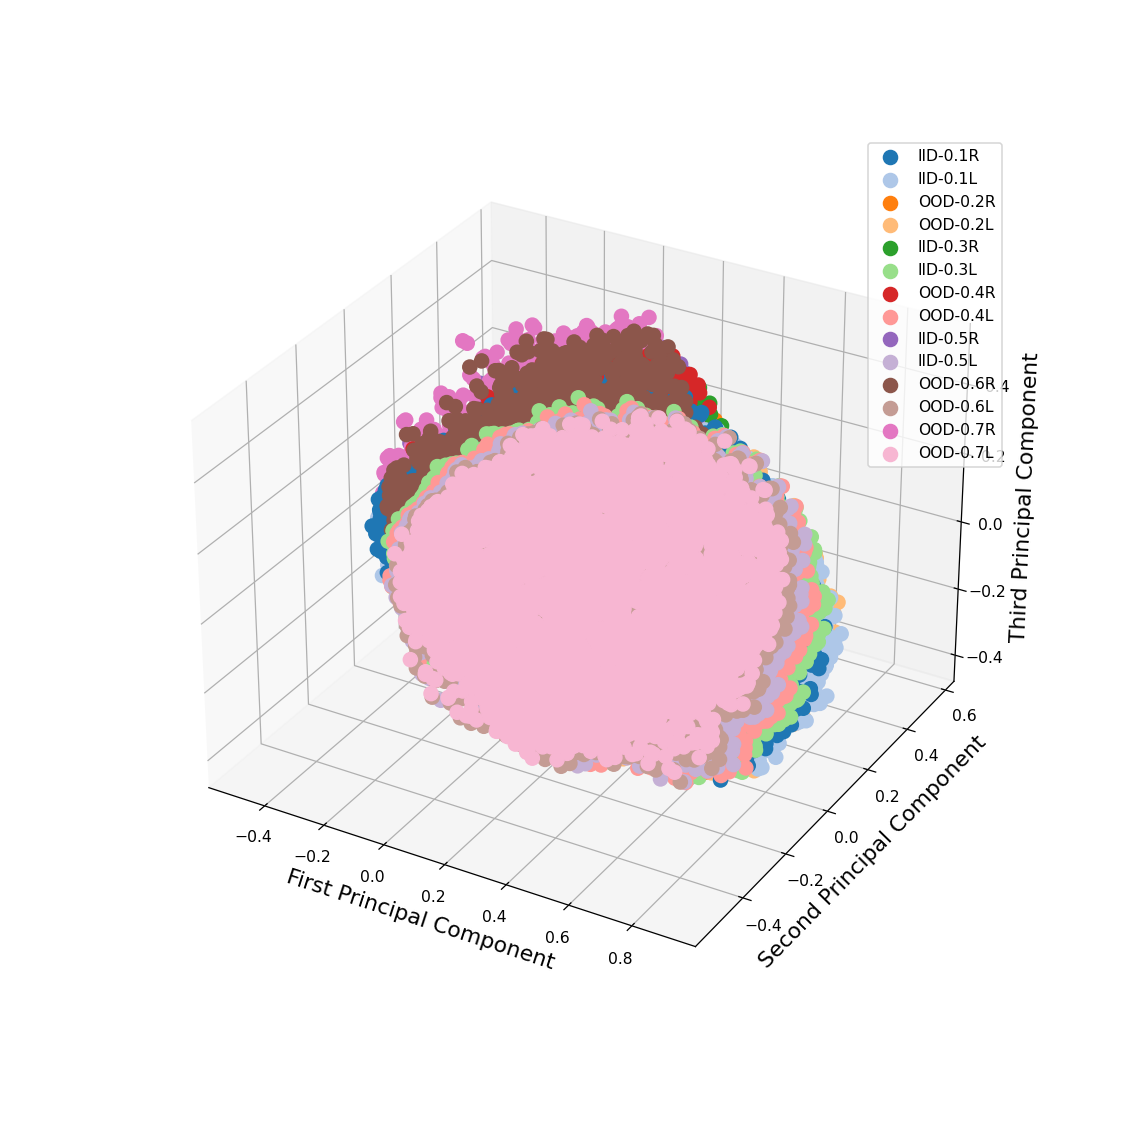

In [19]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

print(pca.explained_variance_ratio_)



Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l not in []:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

Do the same with T-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.003s...


/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 70000 samples in 116.809s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for sample 13000 / 70000
[t-SNE] Computed conditional probabilities for sample 14000 / 700

<IPython.core.display.Javascript object>


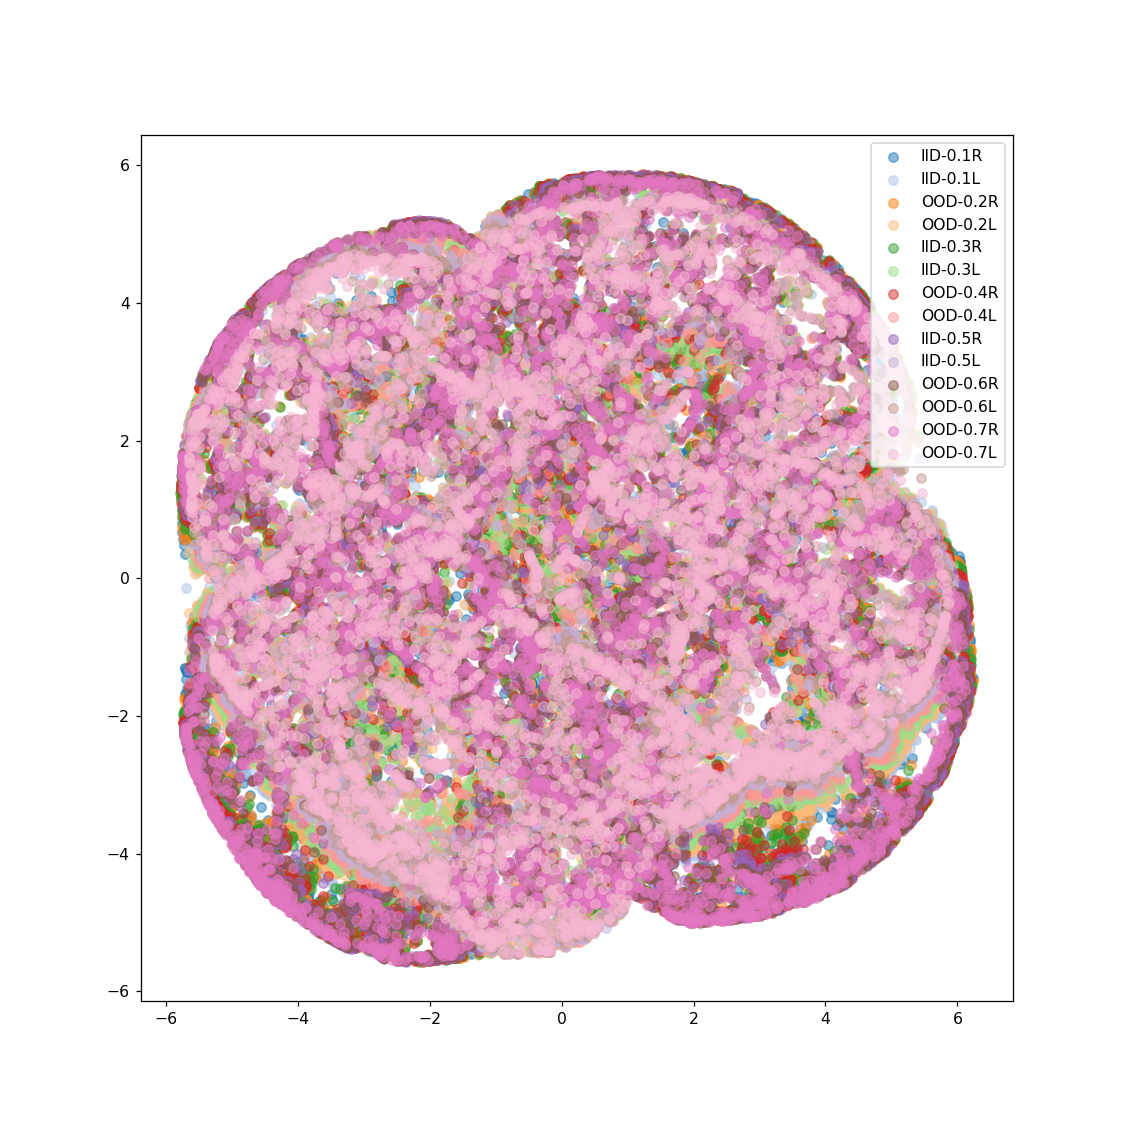

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()

[0.2726597  0.23794135]


<IPython.core.display.Javascript object>


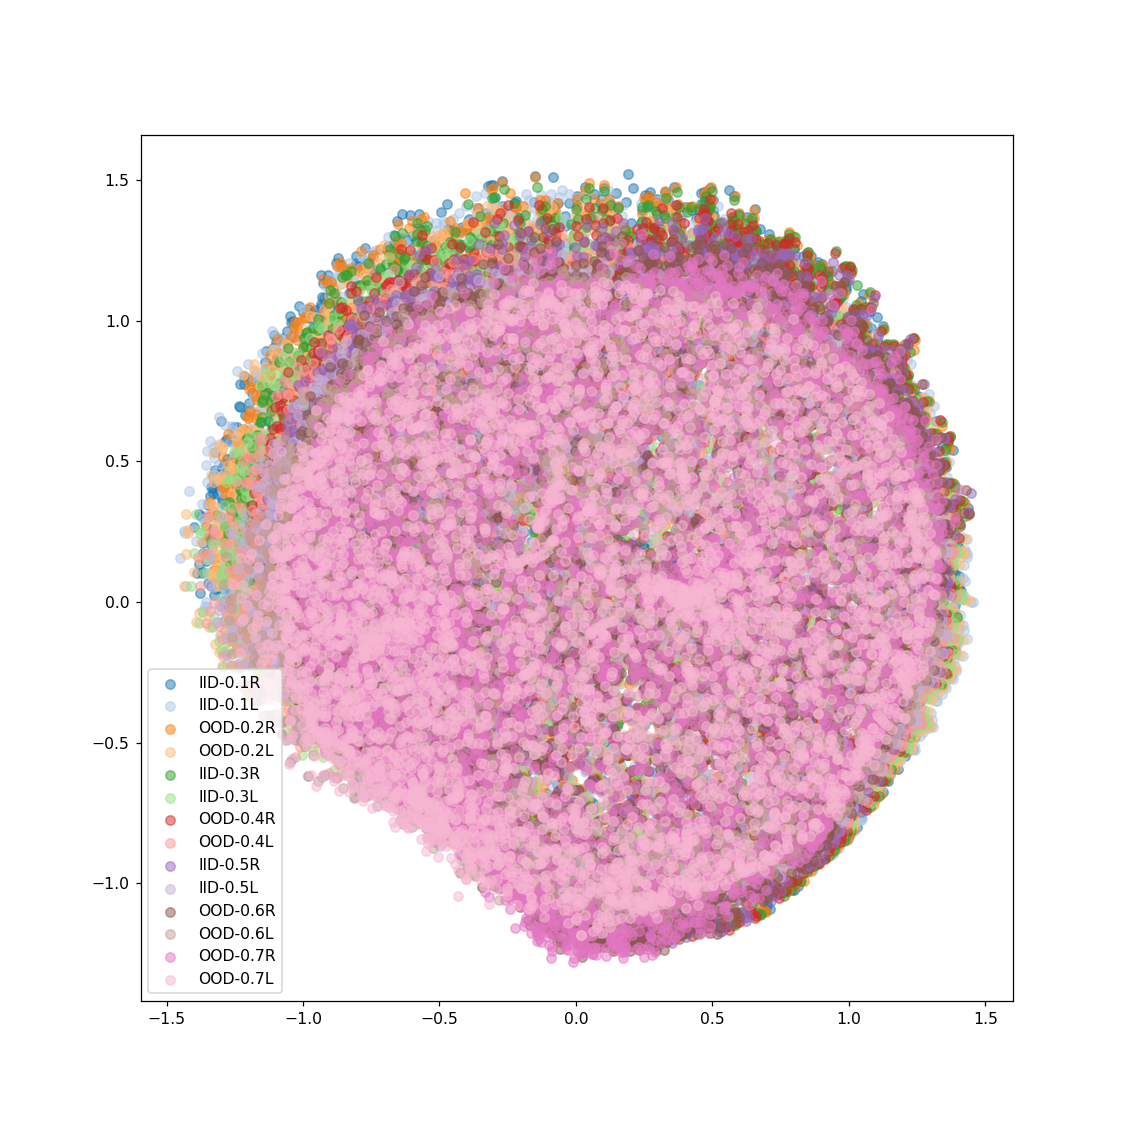

In [21]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


In [22]:
fig.savefig('pca-latent-full.png', dpi=300, bbox_inches="tight")

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.003s...
[t-SNE] Computed neighbors for 70000 samples in 116.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

<IPython.core.display.Javascript object>


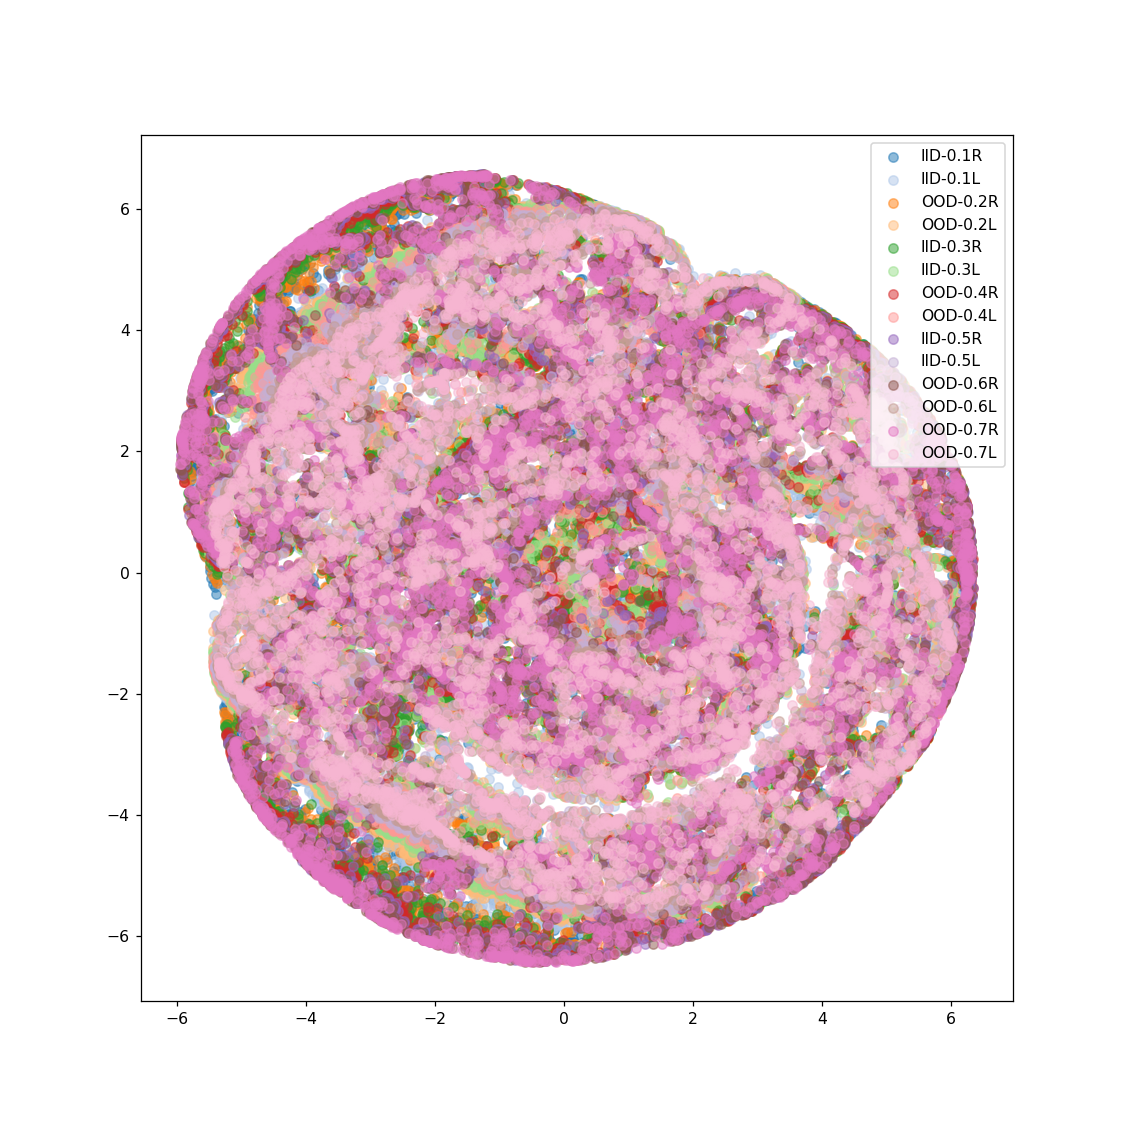

In [23]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


In [24]:
fig.savefig('tsne-style.png', dpi=300, bbox_inches="tight")

In [25]:
pca_eval_proj

NameError: name 'pca_eval_proj' is not defined

## Visualize the embeddings at Epoch 1000

In [26]:
!ls ../eval_embedding/contrast_dual_style_multiseed_1/P6_1000test

00.1l.npy   20.2r.npy	320.4l.npy  440.5r.npy	560.7l.npy  690.1r.npy
00.1r.npy   20.3l.npy	320.4r.npy  440.6l.npy	560.7r.npy  690.2l.npy
00.2l.npy   20.3r.npy	320.5l.npy  440.6r.npy	570.1l.npy  690.2r.npy
00.2r.npy   20.4l.npy	320.5r.npy  440.7l.npy	570.1r.npy  690.3l.npy
00.3l.npy   20.4r.npy	320.6l.npy  440.7r.npy	570.2l.npy  690.3r.npy
00.3r.npy   20.5l.npy	320.6r.npy  450.1l.npy	570.2r.npy  690.4l.npy
00.4l.npy   20.5r.npy	320.7l.npy  450.1r.npy	570.3l.npy  690.4r.npy
00.4r.npy   20.6l.npy	320.7r.npy  450.2l.npy	570.3r.npy  690.5l.npy
00.5l.npy   20.6r.npy	330.1l.npy  450.2r.npy	570.4l.npy  690.5r.npy
00.5r.npy   20.7l.npy	330.1r.npy  450.3l.npy	570.4r.npy  690.6l.npy
00.6l.npy   20.7r.npy	330.2l.npy  450.3r.npy	570.5l.npy  690.6r.npy
00.6r.npy   210.1l.npy	330.2r.npy  450.4l.npy	570.5r.npy  690.7l.npy
00.7l.npy   210.1r.npy	330.3l.npy  450.4r.npy	570.6l.npy  690.7r.npy
00.7r.npy   210.2l.npy	330.3r.npy  450.5l.npy	570.6r.npy  700.1l.npy
100.1l.npy  210.2r.npy	330.4l.npy  450.5r.npy

In [27]:
def get_eval_embed(inp='.1r', type='style_embedding', folder='../eval_embedding/contrast_dual_style_multiseed_1/P6_1000test'):
    embeds = []
    labels = []
    for file in glob.glob('{}/*{}.npy'.format(folder, inp)):
#         print(file)
        embedding = np.load(file, allow_pickle=True)
        # print(embedding[()].keys()) 'style_embedding', 'label', 'latent_content_space', 'first_concat', 'second_concat'
        embed = np.array(embedding[()][type])
        embed_dim = embed.shape[1]
        embed = embed.reshape(-1, embed_dim)
        embeds.append(embed)
    embeds = np.vstack(embeds)
    # print(embeds.shape)
    ev_embeds = embeds
    return ev_embeds

n = 2
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)

In [28]:
def fit_pca(n=2):
    n = n
    ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(n, axis=1)
    ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(n, axis=1)
    ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(n, axis=1)
    ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(n, axis=1)
    ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(n, axis=1)
    ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(n, axis=1)
    ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(n, axis=1)
    ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(n, axis=1)
    ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(n, axis=1)
    ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(n, axis=1)
    ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(n, axis=1)
    ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(n, axis=1)
    ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(n, axis=1)
    ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(n, axis=1)
    eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
    eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
    ev_labels = np.arange(14).reshape(-1, 1)
    eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

    pca = PCA(n_components=3)
    pca.fit(eval_iid_embedding)
    return pca

[0.6338229  0.23159738 0.10529934]


<IPython.core.display.Javascript object>


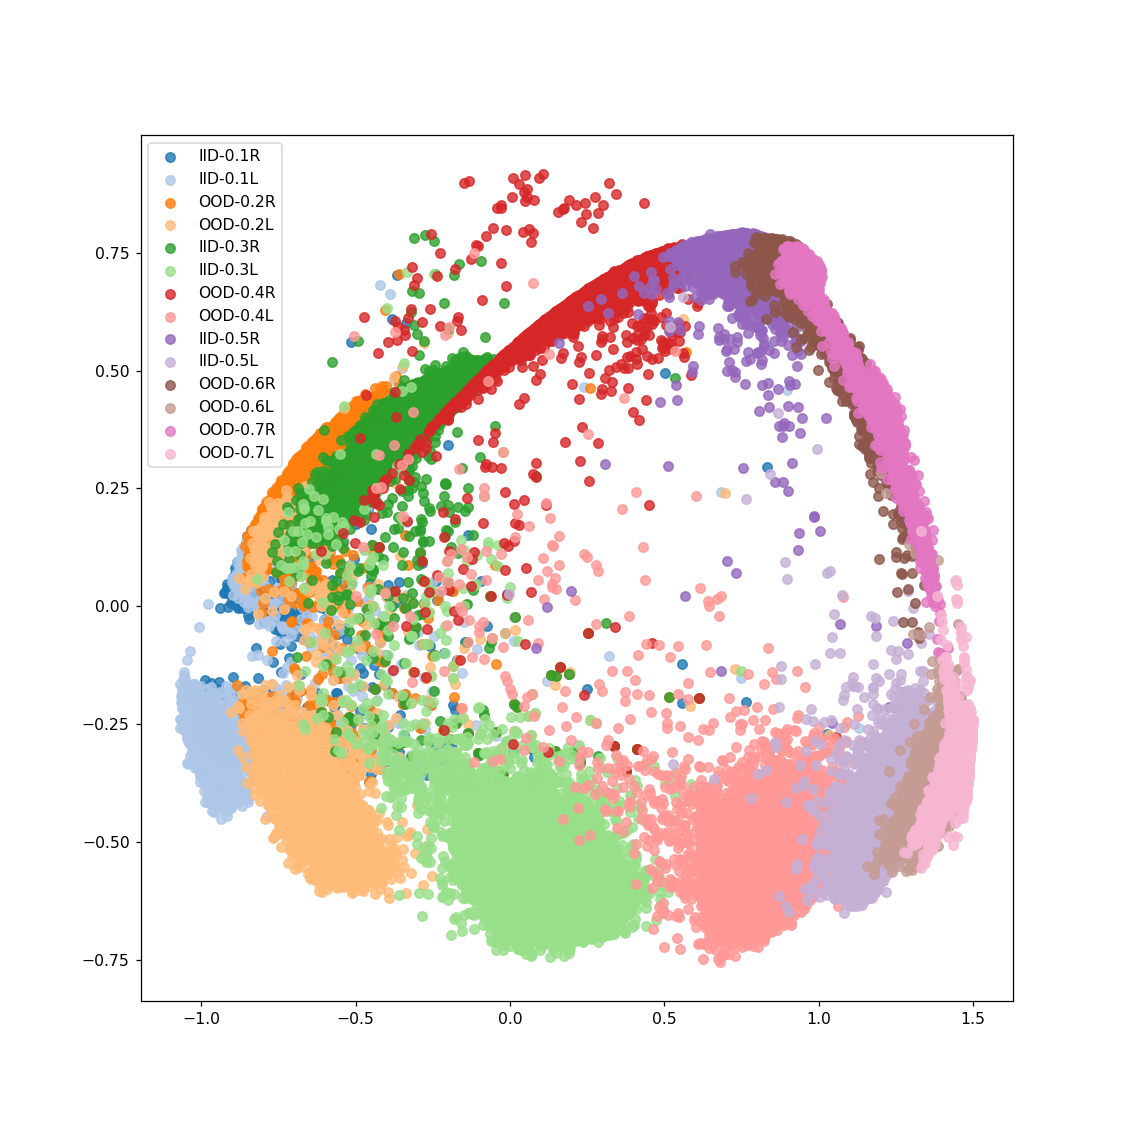

In [29]:
# fit a pca that projects to style embedding direction
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

# pca = PCA(n_components=3)
# pca.fit(eval_iid_embedding)
pca = fit_pca()
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.8)
plt.legend()

[0.6711253  0.24563396 0.08324072]


<IPython.core.display.Javascript object>


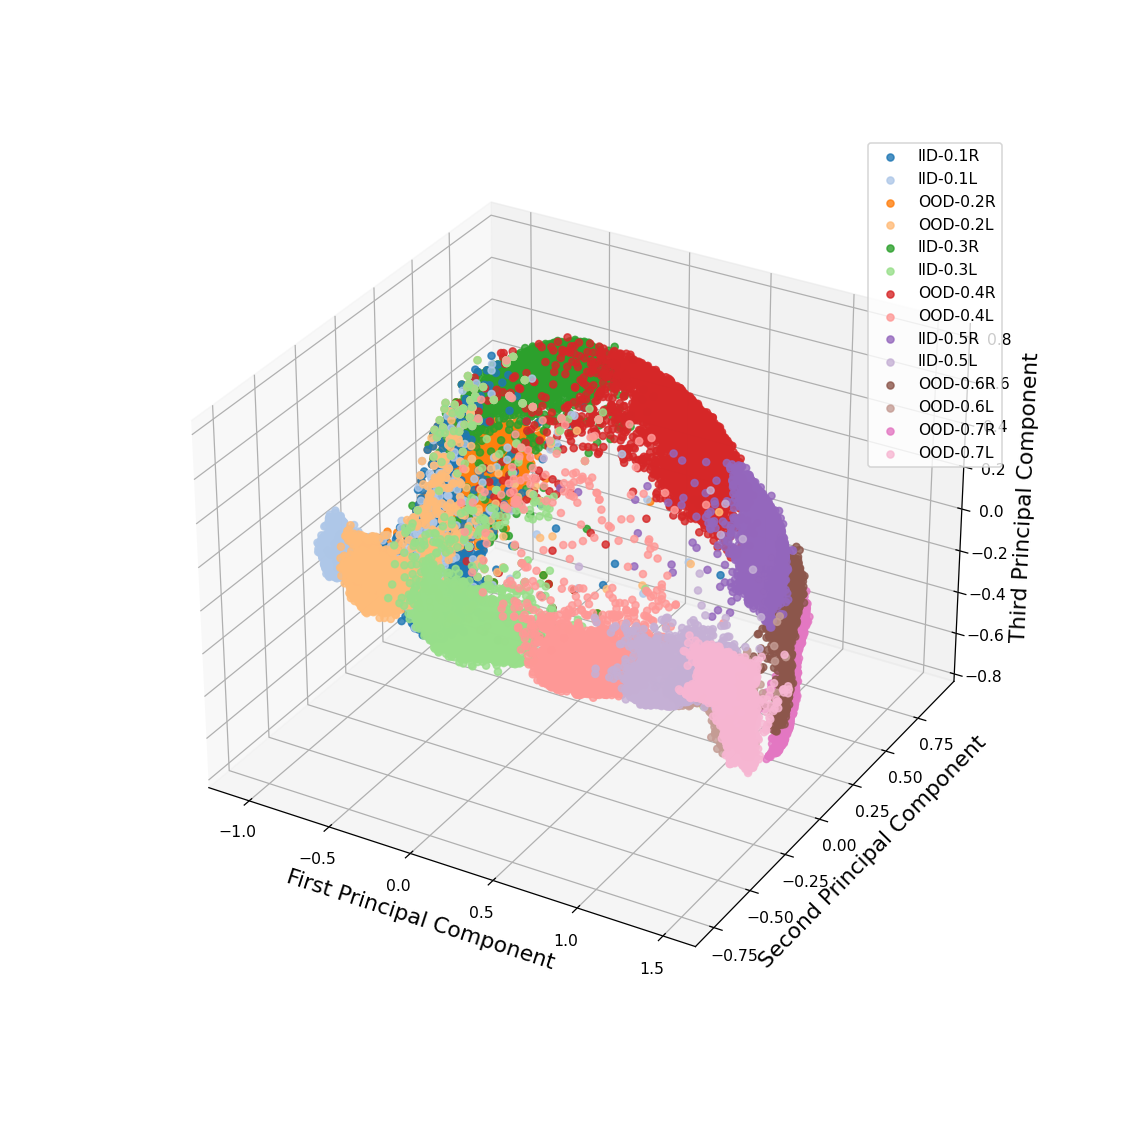

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = eval_iid_embedding
y = eval_labels
target_X = eval_all_embedding


# pca = PCA(n_components=3)
# pca.fit(X) 
X_pca = pca.transform(target_X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=0.8)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.002s...
[t-SNE] Computed neighbors for 70000 samples in 110.297s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

<IPython.core.display.Javascript object>


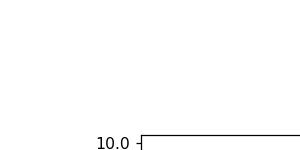

In [32]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()

### Visualize the first concatenated embeddings
Get the first concatenated embeddings: <invariant, style>
The shape of concatenated embeddings are `bz, 24`

In [33]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='first_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='first_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='first_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='first_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='first_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='first_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='first_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='first_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='first_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='first_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='first_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='first_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='first_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='first_concat')

[0.6338229  0.23159738 0.10529934]


<IPython.core.display.Javascript object>


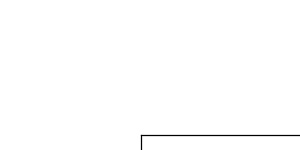

In [34]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in []:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.6338229  0.23159738 0.10529934]


<IPython.core.display.Javascript object>


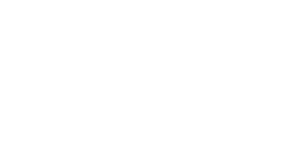

In [35]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

print(pca.explained_variance_ratio_)


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l not in []:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

### Second concat

In [36]:
ev_embed_1_r = get_eval_embed(inp='*.1r', type='second_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='second_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='second_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='second_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='second_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='second_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='second_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='second_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r', type='second_concat')

ev_embed_5_l = get_eval_embed(inp='*.5l', type='second_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='second_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='second_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='second_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='second_concat')

In [37]:
pca = fit_pca(4)

[0.633823   0.23159741 0.10529929]


<IPython.core.display.Javascript object>


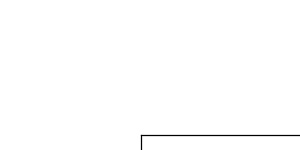

In [38]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in []:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,1],pca_proj[indices,0], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=1, s=100)
plt.legend()


[0.633823   0.23159741 0.10529929]


<IPython.core.display.Javascript object>


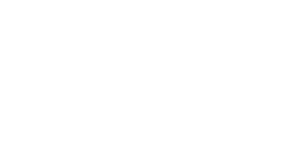

In [39]:
target_X = eval_all_embedding
X_pca = pca.transform(target_X) 

print(pca.explained_variance_ratio_)



Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cmap = cm.get_cmap('tab20')
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    if l not in []:
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=np.array(cmap(l)).reshape(1,4), label = legends[l] ,alpha=1, s=80)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()